### Perform EDA on salary_purchased dataset

In [1]:
import numpy as np
import pandas as pd

In [294]:
df = pd.read_csv("salary_purchased.csv")

In [295]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [296]:
dt = df.copy()

In [297]:
dt

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [298]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [299]:
dt.isnull()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [300]:
dt.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [301]:
dt.duplicated().sum()

0

In [302]:
dt['Country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [303]:
dt.Country.value_counts()

France     4
Spain      3
Germany    3
Name: Country, dtype: int64

In [304]:
dt['Age'].unique()

array([44., 27., 30., 38., 40., 35., nan, 48., 50., 37.])

In [305]:
dt.Age.value_counts()

37.0    1
50.0    1
48.0    1
35.0    1
40.0    1
38.0    1
30.0    1
27.0    1
44.0    1
Name: Age, dtype: int64

In [306]:
dt['Salary'].unique()

array([72000., 48000., 54000., 61000.,    nan, 58000., 52000., 79000.,
       83000., 67000.])

In [307]:
dt.Salary.value_counts()

67000.0    1
83000.0    1
79000.0    1
52000.0    1
58000.0    1
61000.0    1
54000.0    1
48000.0    1
72000.0    1
Name: Salary, dtype: int64

In [308]:
dt['Purchased'].unique()

array(['No', 'Yes'], dtype=object)

In [309]:
dt.Purchased.value_counts()

No     5
Yes    5
Name: Purchased, dtype: int64

In [310]:
dt.drop([4,6],axis = 0,inplace = True)

In [311]:
dt

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
5,France,35.0,58000.0,Yes
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [312]:
dt.describe()

,Age,Salary
count,8.000000,8.000000
mean,38.625000,65250.000000
std,8.210403,12232.859729
min,27.000000,48000.000000
25%,33.750000,57000.000000
50%,37.500000,64000.000000
75%,45.000000,73750.000000
max,50.000000,83000.000000


In [313]:
import matplotlib.pyplot as plt

[]

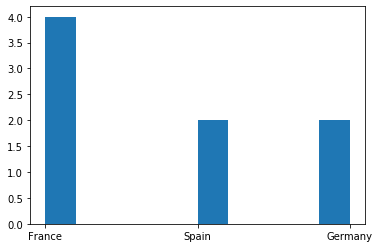

In [314]:
plt.hist(dt.Country)
plt.plot()

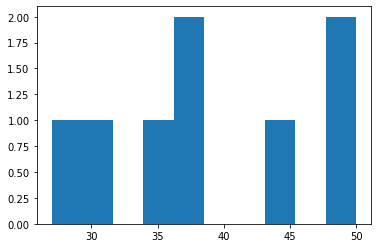

In [315]:
plt.hist(dt.Age)
plt.show()

[]

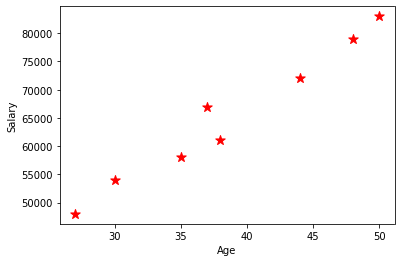

In [316]:
plt.scatter(df.Age,df.Salary,marker='*',c='red',s=100)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.plot()

In [317]:
import seaborn as sns

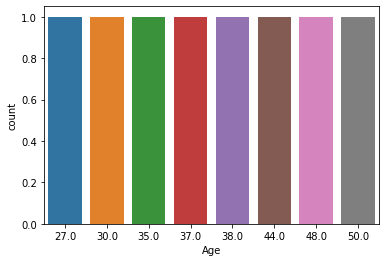

In [318]:
sns.countplot(x='Age',data=dt)

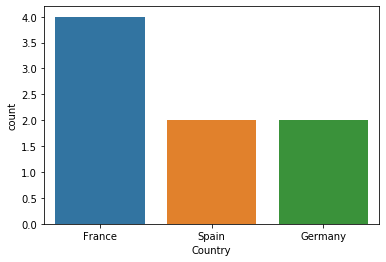

In [319]:
sns.countplot(x='Country',data=dt)

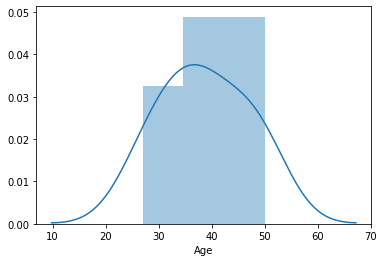

In [320]:
sns.distplot(dt.Age)

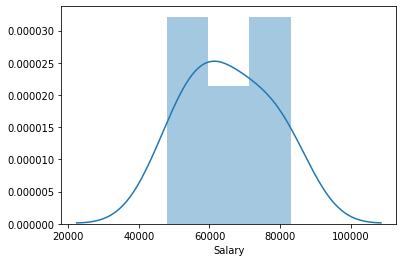

In [321]:
sns.distplot(dt.Salary)

In [322]:
from sklearn.preprocessing import LabelEncoder

In [323]:
le = LabelEncoder()

In [324]:
dt['Country'] = le.fit_transform(dt['Country'])

In [325]:
dt['Purchased'] = le.fit_transform(dt['Purchased'])

In [326]:
dt

,Country,Age,Salary,Purchased
0,0,44.0,72000.0,0
1,2,27.0,48000.0,1
2,1,30.0,54000.0,0
3,2,38.0,61000.0,0
5,0,35.0,58000.0,1
7,0,48.0,79000.0,1
8,1,50.0,83000.0,0
9,0,37.0,67000.0,1


In [327]:
from sklearn.preprocessing import OneHotEncoder

In [328]:
oho = OneHotEncoder()

In [330]:
dt.reset_index(drop=True,inplace = True)

In [332]:
dt1=pd.DataFrame(oho.fit_transform(dt[['Country']]).toarray())

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [335]:
dt = dt1.join(dt)

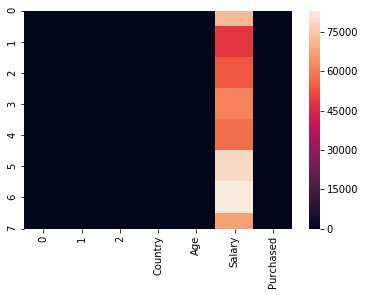

In [337]:
sns.heatmap(dt)

In [338]:
from sklearn.model_selection import train_test_split

In [339]:
X = dt.drop(['Purchased'],axis=1)
y = dt['Purchased']

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [346]:
from sklearn.preprocessing import MinMaxScaler

In [345]:
preprocessing.normalize(dt[['Age']])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [347]:
scaler = MinMaxScaler()

In [348]:
scaled = scaler.fit_transform(dt)

In [349]:
scaled

array([[1.        , 0.        , 0.        , 0.        , 0.73913043,
        0.68571429, 0.        ],
       [0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        ],
       [0.        , 1.        , 0.        , 0.5       , 0.13043478,
        0.17142857, 0.        ],
       [0.        , 0.        , 1.        , 1.        , 0.47826087,
        0.37142857, 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.34782609,
        0.28571429, 1.        ],
       [1.        , 0.        , 0.        , 0.        , 0.91304348,
        0.88571429, 1.        ],
       [0.        , 1.        , 0.        , 0.5       , 1.        ,
        1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.43478261,
        0.54285714, 1.        ]])

In [351]:
from sklearn.preprocessing import StandardScaler

In [352]:
scaler = StandardScaler()

In [354]:
scaled1 = scaler.fit_transform(dt)
scaled1

array([[ 1.        , -0.57735027, -0.57735027, -0.90453403,  0.69985807,
         0.58989097, -1.        ],
       [-1.        , -0.57735027,  1.73205081,  1.50755672, -1.51364653,
        -1.50749915,  1.        ],
       [-1.        ,  1.73205081, -0.57735027,  0.30151134, -1.12302807,
        -0.98315162, -1.        ],
       [-1.        , -0.57735027,  1.73205081,  1.50755672, -0.08137885,
        -0.37141284, -1.        ],
       [ 1.        , -0.57735027, -0.57735027, -0.90453403, -0.47199731,
        -0.6335866 ,  1.        ],
       [ 1.        , -0.57735027, -0.57735027, -0.90453403,  1.22068269,
         1.20162976,  1.        ],
       [-1.        ,  1.73205081, -0.57735027,  0.30151134,  1.48109499,
         1.55119478, -1.        ],
       [ 1.        , -0.57735027, -0.57735027, -0.90453403, -0.211585  ,
         0.1529347 ,  1.        ]])